In [1]:
import pandas as pd

In [2]:
imdb_titles_path = '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/title.basics.tsv'
imdb_ratings_path = '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/title.ratings.tsv'
imdb_principals_path = '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/title.principals.tsv'
imdb_crew_path = '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/title.crew.tsv'
imdb_names_path = '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/name.basics.tsv'
rotten_tomatoes_movies_path = '/Users/antoniam/Desktop/personal/netflix-ratings/data/rotten_tomatoes/rotten_tomatoes_movies.csv'
netflix_titles_path = '/Users/antoniam/Desktop/personal/netflix-ratings/data/netflix/netflix_titles.csv'

## IMDB dataset

In [3]:
imdb_titles_df = pd.read_csv(imdb_titles_path, '\t', nrows=100000, low_memory=False)
imdb_titles_df.head(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"


In [4]:
imdb_ratings_df = pd.read_csv(imdb_ratings_path,'\t', nrows=100000)
imdb_ratings_df.head(2)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1720
1,tt0000002,6.0,211


In [5]:
imdb_principals_df = pd.read_csv(imdb_principals_path,'\t', nrows=100000)
imdb_principals_df.head(2)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N


In [6]:
imdb_names_df = pd.read_csv(imdb_names_path,'\t', nrows=100000)
imdb_names_df.head(2)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0050419,tt0031983,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0117057,tt0071877,tt0038355"


## Rotten Tomatoes Dataset

In [7]:
rt_df = pd.read_csv(rotten_tomatoes_movies_path)
rt_df.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


## Netflix Dataset

In [8]:
netflix_df = pd.read_csv(netflix_titles_path)
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


## Tables Create Statements

In [9]:
import psycopg2

In [10]:
def create_database():

    # connect to default database
    conn = psycopg2.connect("host=127.0.0.1 dbname=postgres user=antoniam")
    conn.set_session(autocommit=True)
    cur = conn.cursor()
    
    # create sparkify database with UTF8 encoding
    cur.execute("""
    SELECT pg_terminate_backend(pg_stat_activity.pid)
    FROM pg_stat_activity
    WHERE pg_stat_activity.datname = 'movies_db';""")
    cur.execute("DROP DATABASE IF EXISTS movies_db")
    cur.execute("CREATE DATABASE movies_db WITH ENCODING 'utf8' TEMPLATE template0")

    # close connection to default database
    conn.close()    
    
    # connect to sparkify database
    conn = psycopg2.connect("host=127.0.0.1 dbname=movies_db")
    conn.set_session(autocommit=True)
    cur = conn.cursor()
    
    return cur, conn

In [11]:
cur, conn = create_database()

In [12]:
create_staging_imdb_titles ="""CREATE TABLE IF NOT EXISTS staging_imdb_titles(
tconst VARCHAR NOT NULL PRIMARY KEY,
titleType VARCHAR,
primaryTitle VARCHAR,
originalTitle VARCHAR,
isAdult VARCHAR,
startYear VARCHAR,
endYear VARCHAR,
runtimeMinutes VARCHAR,
genres VARCHAR);
"""

create_staging_imdb_ratings ="""CREATE TABLE IF NOT EXISTS staging_imdb_ratings(
tconst VARCHAR NOT NULL,
averageRating FLOAT,
numVotes INT);
"""

create_staging_imdb_principals = """CREATE TABLE IF NOT EXISTS staging_imdb_principals(
tconst VARCHAR NOT NULL,
ordering INTEGER NOT NULL,
nconst VARCHAR NOT NULL, 
category VARCHAR NOT NULL,
job VARCHAR NOT NULL,
characters VARCHAR NOT NULL);
"""

create_staging_imdb_crew = """CREATE TABLE IF NOT EXISTS staging_imdb_crew(
tconst VARCHAR NOT NULL,
directors VARCHAR, 
writers VARCHAR);
"""

create_staging_imdb_names = """CREATE TABLE IF NOT EXISTS staging_imdb_names(
nconst VARCHAR NOT NULL PRIMARY KEY,
primaryName VARCHAR NOT NULL,
birthYear VARCHAR,
deathYear VARCHAR,
primaryProfession VARCHAR,
knownForTitles VARCHAR);
"""

create_staging_rotten_tomatoes_titles = """CREATE TABLE IF NOT EXISTS staging_rotten_tomatoes_titles(
rotten_tomatoes_link VARCHAR, 
movie_title VARCHAR,
movie_info VARCHAR,
critics_consensus VARCHAR, 
content_rating VARCHAR, 
genres VARCHAR, 
directors VARCHAR, 
authors VARCHAR,
actors VARCHAR, 
original_release_date DATE, 
streaming_release_date DATE, 
runtime FLOAT,
production_company VARCHAR, 
tomatometer_status VARCHAR, 
tomatometer_rating FLOAT,
tomatometer_count INT, 
audience_status VARCHAR, 
audience_rating FLOAT,
audience_count INT, 
tomatometer_top_critics_count INT,
tomatometer_fresh_critics_count INT, 
tomatometer_rotten_critics_count INT);
"""
create_staging_netflix_titles = """CREATE TABLE IF NOT EXISTS staging_netflix_titles(
show_id VARCHAR NOT NULL PRIMARY KEY,
"type" VARCHAR,
title VARCHAR,
director VARCHAR,
"cast" VARCHAR,
country VARCHAR,
date_added DATE,
release_year INT4,
rating VARCHAR,
duration VARCHAR,
listed_in VARCHAR,
description VARCHAR);
"""

In [13]:
create_titles = \
"""CREATE TABLE IF NOT EXISTS titles(
  id SERIAL PRIMARY KEY,
  netflix_id VARCHAR NOT NULL,
  imdb_id VARCHAR,
  rt_id VARCHAR,
  type VARCHAR,
  name VARCHAR,
  normalized_name VARCHAR,
  netflix_description VARCHAR,
  release_year INT4,
  runtime_minutes INT,
  country VARCHAR,
  rated VARCHAR,
  imdb_avg_score FLOAT,
  imdb_n_ratings INT,
  rt_critics_score FLOAT,
  rt_n_critics INT,
  rt_audience_score FLOAT,
  rt_n_audience INT,
  rt_critics_consensus VARCHAR);
"""

create_roles = \
"""CREATE TABLE IF NOT EXISTS roles(
id SERIAL PRIMARY KEY,
title_id VARCHAR,
person_id VARCHAR,
role_name VARCHAR NOT NULL
);
"""

create_persons = \
"""CREATE TABLE IF NOT EXISTS persons(
id VARCHAR NOT NULL PRIMARY KEY,
full_name VARCHAR NOT NULL,
birth_year INT4,
death_year INT4
);
"""

create_genres = \
"""CREATE TABLE IF NOT EXISTS genres(
id SERIAL PRIMARY KEY,
title_id VARCHAR NOT NULL,
genre_name VARCHAR NOT NULL);"""


In [14]:
staging_tables_sql = [create_staging_imdb_titles, create_staging_imdb_ratings, create_staging_imdb_principals, create_staging_imdb_names, 
 create_staging_rotten_tomatoes_titles, create_staging_netflix_titles, create_staging_imdb_crew]

final_tables = [create_titles, create_roles, create_persons, create_genres]

In [15]:
for s in staging_tables_sql + final_tables:
    cur.execute(s)

In [16]:
copy_staging_titles = f"COPY staging_imdb_titles FROM '{imdb_titles_path}' delimiter '\t' CSV HEADER"
copy_staging_ratings = f"COPY staging_imdb_ratings FROM '{imdb_ratings_path}' delimiter '\t' CSV HEADER"
copy_staging_principals = f"COPY staging_imdb_principals FROM '{imdb_principals_path}' delimiter '\t' CSV HEADER"
copy_staging_crew = f"COPY staging_imdb_crew FROM '{imdb_crew_path}' delimiter '\t' CSV HEADER"
copy_staging_names = f"COPY staging_imdb_names FROM '{imdb_names_path}' delimiter '\t' CSV HEADER"
copy_staging_rt = f"COPY staging_rotten_tomatoes_titles FROM '{rotten_tomatoes_movies_path}' delimiter ',' CSV HEADER"
copy_staging_netflix = f"COPY staging_netflix_titles FROM '{netflix_titles_path}' delimiter ',' CSV HEADER"


copy_staging = [copy_staging_titles, copy_staging_ratings, copy_staging_principals, copy_staging_names, copy_staging_crew, copy_staging_rt, copy_staging_netflix]

for s in copy_staging: 
    print(s)
    cur.execute(s)

COPY staging_imdb_titles FROM '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/title.basics.tsv' delimiter '	' CSV HEADER
COPY staging_imdb_ratings FROM '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/title.ratings.tsv' delimiter '	' CSV HEADER
COPY staging_imdb_principals FROM '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/title.principals.tsv' delimiter '	' CSV HEADER
COPY staging_imdb_names FROM '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/name.basics.tsv' delimiter '	' CSV HEADER
COPY staging_imdb_crew FROM '/Users/antoniam/Desktop/personal/netflix-ratings/data/imdb/title.crew.tsv' delimiter '	' CSV HEADER
COPY staging_rotten_tomatoes_titles FROM '/Users/antoniam/Desktop/personal/netflix-ratings/data/rotten_tomatoes/rotten_tomatoes_movies.csv' delimiter ',' CSV HEADER
COPY staging_netflix_titles FROM '/Users/antoniam/Desktop/personal/netflix-ratings/data/netflix/netflix_titles.csv' delimiter ',' CSV HEADER


## Quality checks

MAKE SURE TABLES CONTAIN RECORDS

In [65]:
cur.execute('select count(*) from staging_imdb_titles LIMIT 10')
assert cur.fetchone()[0] > 1, 'Records did not get copied correctly'

cur.execute('select count(*) from staging_imdb_ratings LIMIT 10')
assert cur.fetchone()[0] > 1, 'Records did not get copied correctly'

cur.execute('select count(*) from staging_imdb_principals LIMIT 10')
assert cur.fetchone()[0] > 1, 'Records did not get copied correctly'

cur.execute('select count(*) from staging_imdb_crew LIMIT 10')
assert cur.fetchone()[0] > 1, 'Records did not get copied correctly'

cur.execute('select count(*) from staging_imdb_names LIMIT 10')
assert cur.fetchone()[0] > 1, 'Records did not get copied correctly'

cur.execute('select count(*) from staging_rotten_tomatoes_titles LIMIT 10')
assert cur.fetchone()[0] > 1, 'Records did not get copied correctly'

cur.execute('select count(*) from staging_netflix_titles LIMIT 10')
assert cur.fetchone()[0] > 1, 'Records did not get copied correctly'

## Final tables

### Genres table

In [17]:
%%time
st = \
"""INSERT INTO genres(title_id, genre_name)
   SELECT tconst, unnest(string_to_array(genres, ',')) as genre
   FROM staging_imdb_titles 
   WHERE genres!='\\N' 
   AND titleType in ('tvSpecial', 'tvSeries', 'tvShort', 'movie', 'tvMovie', 'short', 'tvMiniSeries')
   """
cur.execute(st)

CPU times: user 993 µs, sys: 981 µs, total: 1.97 ms
Wall time: 27.3 s


### Persons table

In [18]:
%%time
st = \
"""INSERT INTO persons(id, full_name, birth_year, death_year)
SELECT nconst, primaryName, 
NULLIF(regexp_replace(birthYear, '\D','','g'), '')::numeric AS birth_year,
NULLIF(regexp_replace(deathYear, '\D','','g'), '')::numeric AS death_year
from staging_imdb_names
"""
cur.execute(st)

CPU times: user 3.79 ms, sys: 2.27 ms, total: 6.06 ms
Wall time: 2min 56s


### Roles table

In [19]:
%%time
st = \
"""INSERT INTO roles(title_id, person_id, role_name)
SELECT titles.tconst, nconst, category
FROM staging_imdb_titles titles
JOIN staging_imdb_principals principals
ON titles.tconst = principals.tconst
WHERE principals.category in ('director', 'writer', 'actor', 'actress') 
AND titles.titleType in ('tvSpecial', 'tvSeries', 'tvShort', 'movie', 'tvMovie', 'short', 'tvMiniSeries')

UNION
SELECT titles.tconst, unnest(string_to_array(directors, ',')) as nconst, 'director'
FROM staging_imdb_titles titles
JOIN staging_imdb_crew crew
ON titles.tconst = crew.tconst
WHERE directors!='\\N'
AND titles.titleType in ('tvSpecial', 'tvSeries', 'tvShort', 'movie', 'tvMovie', 'short', 'tvMiniSeries')

UNION
SELECT titles.tconst, unnest(string_to_array(writers, ',')) as nconst, 'writer'
FROM staging_imdb_titles titles
JOIN staging_imdb_crew crew
ON titles.tconst = crew.tconst
WHERE writers!='\\N'
AND titles.titleType in ('tvSpecial', 'tvSeries', 'tvShort', 'movie', 'tvMovie', 'short', 'tvMiniSeries')
"""
cur.execute(st)

CPU times: user 4.5 ms, sys: 2.46 ms, total: 6.95 ms
Wall time: 4min 37s


### Titles table

In [20]:
cur.execute('DROP TABLE titles')
cur.execute(create_titles)

In [21]:
%%time
st = """
INSERT INTO titles(netflix_id, imdb_id, rt_id, type, name, normalized_name,
  netflix_description, release_year, runtime_minutes, country, rated,
  imdb_avg_score, imdb_n_ratings,
  rt_critics_score, rt_n_critics,
  rt_audience_score, rt_n_audience, rt_critics_consensus)
  
SELECT staging_netflix_titles.show_id, with_imdb.tconst, with_rt.rotten_tomatoes_link,
staging_netflix_titles.type, staging_netflix_titles.title, lower(staging_netflix_titles.title),
staging_netflix_titles.description, staging_netflix_titles.release_year,
CAST(replace(with_imdb.runtimeMinutes, '\\N', '-1') as INT),
staging_netflix_titles.country,  staging_netflix_titles.rating,  
with_imdb.averageRating, with_imdb.numVotes, with_rt.tomatometer_rating, with_rt.tomatometer_count, with_rt.audience_rating, 
with_rt.audience_count, with_rt.critics_consensus

FROM staging_netflix_titles 
LEFT JOIN (
        SELECT distinct netflix.show_id, netflix.type, netflix.title, netflix.country, netflix.release_year, 
                netflix.description, imdb.tconst, runtimeMinutes, averageRating, numVotes
                FROM(
                    SELECT show_id, type, title, country, release_year, description,
                    unnest(string_to_array(staging_netflix_titles.director, ',')) as director,
                    unnest(string_to_array(staging_netflix_titles.cast, ',')) as actor
                    FROM staging_netflix_titles) as netflix
                JOIN(
                    SELECT *
                    FROM staging_imdb_titles 
                    JOIN roles
                    ON roles.title_id = staging_imdb_titles.tconst
                    JOIN persons 
                    ON persons.id = roles.person_id
                    WHERE titleType in ('tvSpecial', 'tvSeries', 'tvShort', 'movie', 'tvMovie', 'short', 'tvMiniSeries')) as imdb
                JOIN staging_imdb_ratings 
                    ON staging_imdb_ratings.tconst = imdb.tconst
            ON lower(netflix.title) = lower(imdb.OriginalTitle)
            AND netflix.release_year BETWEEN CAST(REPLACE(imdb.startYear,'\\N', '0') as INT) 
            AND CAST(REPLACE(imdb.endYear,'\\N', '2050') as INT) 
            AND (netflix.actor = imdb.full_name or netflix.director = imdb.full_name)
        ) as with_imdb
ON with_imdb.show_id = staging_netflix_titles.show_id

LEFT JOIN (
        SELECT distinct netflix.show_id, netflix.type, netflix.title, netflix.country, netflix.release_year, 
                netflix.description, rt.tomatometer_rating, rt.tomatometer_count, rt.audience_rating, rt.audience_count,
                rt.critics_consensus, rt.rotten_tomatoes_link
                FROM(
                    SELECT show_id, type, title, country, release_year, description,
                    unnest(string_to_array(staging_netflix_titles.director, ',')) as director,
                    unnest(string_to_array(staging_netflix_titles.cast, ',')) as actor
                    FROM staging_netflix_titles) as netflix
                JOIN(
                    SELECT rt.tomatometer_rating, rt.tomatometer_count, rt.audience_rating, rt.audience_count,
                    rt.critics_consensus, rt.movie_title, rt.original_release_date, rotten_tomatoes_link,
                    unnest(string_to_array(rt.directors, ',')) as director,
                    unnest(string_to_array(rt.actors, ',')) as actor
                    FROM staging_rotten_tomatoes_titles rt) rt
                ON lower(netflix.title) = lower(rt.movie_title)
                AND netflix.release_year = extract(year from rt.original_release_date)
                AND (netflix.director = rt.director or netflix.actor = rt.actor) 
                ) as with_rt
ON with_rt.show_id = staging_netflix_titles.show_id
"""
cur.execute(st)

CPU times: user 1.53 ms, sys: 1.19 ms, total: 2.72 ms
Wall time: 53.7 s


## Quality checks

Make sure we have all the netflix titles

In [79]:
cur.execute('SELECT DISTINCT show_id from staging_netflix_titles')
netflix_titles_staging = cur.fetchall()

cur.execute('SELECT DISTINCT netflix_id from titles')
netflix_titles_final = cur.fetchall()

assert sorted(netflix_titles_staging) == sorted(netflix_titles_final)

## EXAMPLE QUERIES

## Get horror movies released after 2016 with rotten tomatoes critics score higher than 70, ordered by imdb score

In [80]:
cur.execute("""SELECT name, imdb_avg_score, rt_critics_score, genre_name
            from titles 
            join genres on titles.imdb_id = genres.title_id
            where rt_critics_score > 70 and release_year > 2016 
            and imdb_avg_score is not NULL
            and genre_name='Horror'
            order by imdb_avg_score DESC
            limit 20""")

In [81]:
cur.fetchall()

[('The Killing of a Sacred Deer', 7.0, 80.0, 'Horror'),
 ('Super Dark Times', 6.6, 90.0, 'Horror'),
 ("Gerald's Game", 6.5, 91.0, 'Horror'),
 ('Creep 2', 6.5, 100.0, 'Horror'),
 ('The Babysitter', 6.3, 72.0, 'Horror'),
 ('Berlin Syndrome', 6.3, 75.0, 'Horror'),
 ('1922', 6.3, 91.0, 'Horror'),
 ('Apostle', 6.3, 78.0, 'Horror'),
 ('It Comes at Night', 6.2, 87.0, 'Horror'),
 ('Cam', 5.9, 93.0, 'Horror'),
 ('Sweetheart', 5.8, 95.0, 'Horror'),
 ('What Keeps You Alive', 5.7, 82.0, 'Horror'),
 ('Little Evil', 5.7, 92.0, 'Horror'),
 ('Lifechanger', 5.4, 86.0, 'Horror'),
 ('Await Further Instructions', 4.8, 80.0, 'Horror'),
 ('Girl on the Third Floor', 4.6, 84.0, 'Horror')]

## Find rotten tomatoes average critics score for all the netflix movies per between year 2000 and 2019

In [82]:
cur.execute("""SELECT release_year, avg(rt_critics_score)
            FROM titles
            where release_year between 2000 AND 2019
            GROUP BY release_year
            ORDER BY release_year""")

In [83]:
cur.fetchall()

[(2000, 48.8),
 (2001, 61.125),
 (2002, 57.94736842105263),
 (2003, 45.89473684210526),
 (2004, 52.1764705882353),
 (2005, 51.7),
 (2006, 53.392857142857146),
 (2007, 50.333333333333336),
 (2008, 50.857142857142854),
 (2009, 59.26190476190476),
 (2010, 45.26190476190476),
 (2011, 61.36585365853659),
 (2012, 57.84848484848485),
 (2013, 62.63265306122449),
 (2014, 54.48571428571429),
 (2015, 63.12765957446808),
 (2016, 62.8125),
 (2017, 69.59223300970874),
 (2018, 62.0),
 (2019, 63.96825396825397)]

## Is there a correlation between:
- imdb and critics score?
- critics score and audience score?

In [84]:
cur.execute("""SELECT imdb_avg_score, rt_critics_score, rt_audience_score
            FROM titles
            WHERE rt_critics_score is not Null 
            AND rt_audience_score is not Null
            AND imdb_avg_score is not Null""")
res = cur.fetchall()

In [85]:
import matplotlib.pyplot as plt

imdb_avg_score = [r[0] for r in res]
rt_critics_score = [r[1] for r in res]
rt_audience_score = [r[2] for r in res]

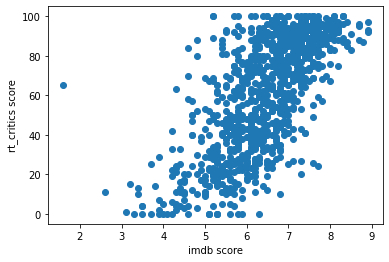

In [86]:
plt.scatter(imdb_avg_score, rt_critics_score)
plt.xlabel('imdb score')
plt.ylabel('rt_critics score')
plt.show()

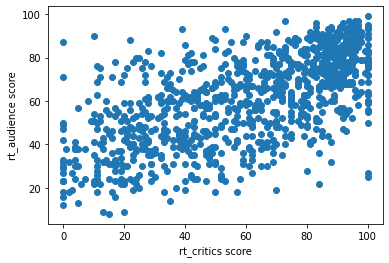

In [87]:
plt.scatter(rt_critics_score, rt_audience_score)
plt.xlabel('rt_critics score')
plt.ylabel('rt_audience score')
plt.show()